### QUAAF Python for Finance Take Home Assignment #1 Solutions

In [1]:
#Package imports you need (feel free to use others!)
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
from datetime import date

#### 1.) Create a list, tuple & dictionary of 5 stock tickers and their most up to date share prices.

In [2]:
#Your code starts here

#Lists have square brackets and are mutable (can be edited/changed without making a new list)
tickers_list = ['AAPL','TSLA','GOOG','FB','MSFT']
prices_list = [1,2,3,4,5]
lists_list = [tickers_list,prices_list] #you can also be fancy and create a list of lists
print(lists_list)

#Tuples have round brackets and are immutable (cannot be edited/changed without making a new tuple)
tickers_tuple = ('AAPL','TSLA','GOOG','FB','MSFT')
prices_tuple = (1,2,3,4,5)
tuples_tuple = (tickers_tuple,prices_tuple) #you can also be fancy and create a tuple of tuples
print(tuples_tuple)

#Dictionaries or hashmaps use curly brackets, link data in key-value pairs and are mutable
tickers_dictionary = {'APPL': 1,'TSLA': 2, 'GOOG': 3,'FB': 4, 'MSFT': 5}
print(tickers_dictionary)

[['AAPL', 'TSLA', 'GOOG', 'FB', 'MSFT'], [1, 2, 3, 4, 5]]
(('AAPL', 'TSLA', 'GOOG', 'FB', 'MSFT'), (1, 2, 3, 4, 5))
{'APPL': 1, 'TSLA': 2, 'GOOG': 3, 'FB': 4, 'MSFT': 5}


#### 2.) From one of your above data structures select and print out the ticker and share price of one of the stocks you found data for above,

In [3]:
#Your code starts here

#Extracting values from the list of lists
print(lists_list[0][0],lists_list[1][0])

#Extracting values from tuple of tuples
print(tuples_tuple[0][0],tuples_tuple[1][0])

#Extracting values from dictionary
keys = list(iter(tickers_dictionary))
print(keys[0], tickers_dictionary['APPL'])

AAPL 1
AAPL 1
APPL 1


#### 3.) Now print out the name and share price for every stock using as little code as possible.

In [4]:
#Your code starts here

#Using a dictionary makes this extremely easy
print(tickers_dictionary)

{'APPL': 1, 'TSLA': 2, 'GOOG': 3, 'FB': 4, 'MSFT': 5}


#### 4.) Let's do some basic math. For your 5 share prices, calculate the mean, std and variance of the lot.

In [5]:
#Your code starts here

#Extracting share prices from list of lists 
prices = lists_list[1][:]

#Or extracting share prices from dictionary
prices = list(tickers_dictionary.values())

#Calculating mean, std, variance using numpy
mean = np.mean(prices)
var = np.var(prices)
std = np.std(prices)

#Checking results
print(mean,var,std)

3.0 2.0 1.4142135623730951


#### 5.) Now some plotting. Plot a bar chart with your 5 tickers on the x, and their corresponding share prices on the y.


<BarContainer object of 5 artists>

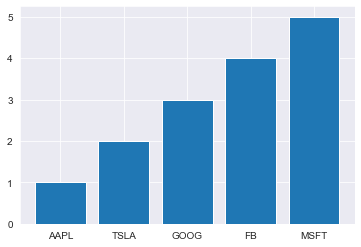

In [6]:
#Your code starts here

#Plotting using matplotlib with seaborn styling to be extra
plt.bar(lists_list[0][:],lists_list[1][:])

#### 6.) Ok now that we've done some basic work with data structures lets do some loops. Using a for loop, iterate through your list of share price values and add 50 to each. Print out the resulting share prices to check.

In [7]:
#Your code starts here
new_prices_list = [i + 50 for i in prices_list]
new_prices_list

[51, 52, 53, 54, 55]

#### 7.) Now using a while loop, iterate through your list of share prices and if any of them are under 500, add 50 to them, until each share price is equal to 500. Print out the resulting share prices to check. I worded this really poorly, sorry for that!

In [8]:
#Your code starts here
i = prices_list[0]
while i < 500:
    i += 50
    print(i)

51
101
151
201
251
301
351
401
451
501


#### 8.) Thats enough intro to python for now, let's do some finance. Using the code I demo'd sunday (also found on the QUAAF github) pull in stock price data for the past 6 months for MELI, SQ, ZG & SEA into a dataframe. Make sure to check the df when you do!

In [9]:
#Your code starts here

#Defining the tickers we're interested in 
equity_tickers = ['MELI','SQ','ZG','SEA']

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data

#Pulling the timeseries data directly from yahoo finance into a dataframe
equity_data= data.DataReader(equity_tickers, 
                       start='2020-7-1', #selecting the starting date (YYYY-MM-DD)
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Checking the 20 most recent values
equity_data.head(10)

Symbols,MELI,SQ,ZG,SEA
Date,,,,
2020-07-01,977.140015,115.900002,58.599998,NaN
2020-07-02,988.419983,113.389999,59.389999,23.780001
2020-07-06,995.929993,118.970001,60.980000,24.100000
2020-07-07,1007.239990,125.599998,62.029999,25.020000
2020-07-08,1015.000000,133.350006,63.200001,24.879999
2020-07-09,1017.450012,129.389999,62.419998,25.150000
2020-07-10,1035.829956,128.050003,61.750000,25.270000
2020-07-13,981.969971,118.650002,58.220001,23.980000
2020-07-14,972.630005,121.239998,57.750000,24.879999


#### 9.) Plot a line chart with all 4 companies (Share price on the y, time on the x axis).

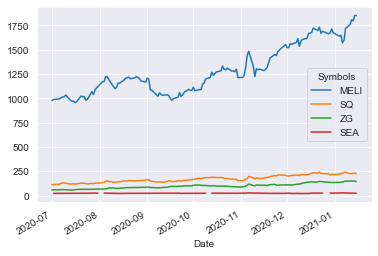

In [10]:
#Your code starts here

#Pandas makes this really easy when working with time series data in dataframes
equity_data.plot()

#### 10.) Calculate the cumulative return of each company over the period. Plot these results just like in 9.

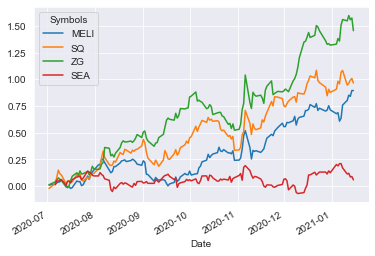

In [11]:
#Your code starts here

#Some quick little math and another easy pandas plot
returns = equity_data.pct_change() #Calculating the percent change of the equity over the period
cumulative_returns = ((1 + returns).cumprod() - 1) #Calculating the cumulative returns of the equity over the period
cumulative_returns.plot()

<BarContainer object of 4 artists>

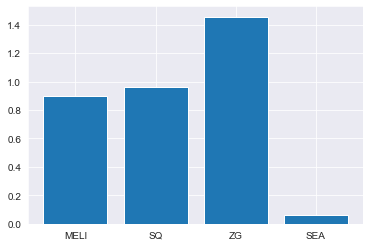

In [12]:
#Finding the overall return as of today (the last value in the cumulative returns df) and plotting the results
overall_returns = list(cumulative_returns.iloc[-1])
plt.bar(equity_tickers,overall_returns)

#### 11.) Calculate the voltaility of each company over the period. Plot these results just like in 9.

<BarContainer object of 4 artists>

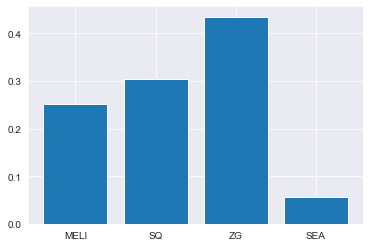

In [13]:
#Your code starts here

#Calculating the volatility over the entire holding period is just the std of the cumulative returns
overall_volatiles = list(cumulative_returns.std())
plt.bar(equity_tickers,overall_volatiles)

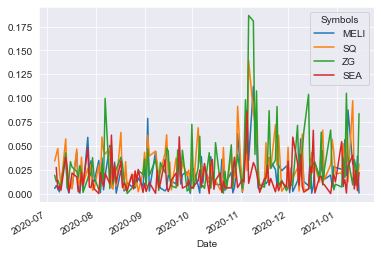

In [14]:
#Rolling volatility isn't much different
volatiles = cumulative_returns.rolling(window=2).std()
volatiles.plot()

## 12.) Calculate the sharpe ratio of each company over the period. Visualize these results.

<BarContainer object of 4 artists>

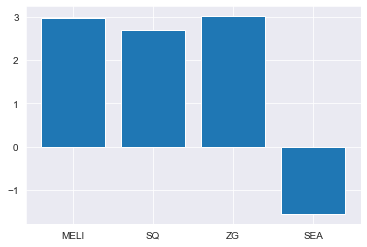

In [15]:
#Your code starts here

#Using the S&P's return over the holding period as the risk free rate
mkt_data= data.DataReader('^GSPTSE', 
                       start='2020-7-1', #selecting the starting date (YYYY-MM-DD)
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Calculating S&PTSX returns just as we did before
mkt_returns = mkt_data.pct_change() #Calculating the percent change of the equity over the period
mkt_cumulative_returns = ((1 + mkt_returns).cumprod() - 1) #Calculating the cumulative returns of the equity over the period
rfr = mkt_cumulative_returns.iloc[-1]
#rfr = 1.090/100 #current US 10yr T-bill yield as alternative rfr

#Now Calculating and Plotting Overall Sharpes
sharpes_list = []
sharpes_list.append((overall_returns[0] - rfr) /overall_volatiles[0])
sharpes_list.append((overall_returns[1] - rfr) /overall_volatiles[1])
sharpes_list.append((overall_returns[2] - rfr) /overall_volatiles[2])
sharpes_list.append((overall_returns[3] - rfr) /overall_volatiles[3])
plt.bar(equity_tickers,sharpes_list)

#### 13.) Calculate the overall return of a portfolio consisting of 25% MELI, 25% SQ, 25& ZG & 25% SEA over the same period. Plot this.

In [16]:
#Your code starts here
import numpy as np

#So all we need to do here is weight the returns and aggregate them
weighted_returns = [i * 0.25 for i in overall_returns]
print(np.sum(weighted_returns))

0.843875874249479


#### 14.) Calculate the overall voltatility of the portfolio in 13 over the same period. Plot this.

In [17]:
#Your code starts here

#Same as before, just with volatiles
weighted_volatiles = [i * 0.25 for i in overall_volatiles]
print(np.sum(weighted_volatiles))

0.261924936617523


#### 15.) Calculate the overall Sharpe ratio of the portfolio in 13 over the same period.

In [18]:
#Your code starts here

#Finally, just as before now with Sharpes
weighted_sharpes = [i * 0.25 for i in sharpes_list]
print(np.sum(weighted_sharpes))

1.778662943542577


#### Congrats! You've finished the assignment. If you have any questions please reference my github https://github.com/BrandonToushan, hit me up on slack or shoot me an email @ brandontoushan@gmail.com!